#KLASIFIKASI INDEKS PENCEMARAN UDARA DI DKI JAKARTA

**Kelompok 2:**
1.   Tricia Estella - 2440003695
2.   Audrey Levina - 2440027921
3.   Nadzla Andrita Intan Ghayatrie - 2440116031



##Latar Belakang & Tujuan

Pada Project kami, kami menggunakan dataset mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta selama satu tahun 2021.

Terdapat 11 variabel dalam dataset ini, yaitu:
1. tanggal : tanggal pengukuran kualitas udara
2. pm10 : partikulat salah satu parameter yang diukur
3. pm25 : partikulat salah satu parameter yang diukur
4. so2 : partikulat salah satu parameter yang diukur
5. co : partikulat salah satu parameter yang diukur
7. o3: partikulat salah satu parameter yang diukur
8. no2 : partikulat salah satu parameter yang diukur
9. max : nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama.
10. critical : parameter yang hasil pengukurannya paling tinggi
11. location : kode lokasi stasiun pemantau kualitas udara di DKI Jakarta.
12. categori : kategori hasil perhitungan ISPU

Dari dataset tersebut, kami akan mengembangkan beberapa model klasifikasi machine learning dengan menggunakan berbagai algoritma: KNN, Decision Tree, Logistic Regression, dan SVM untuk menentukan kategori kualitas udara berdasarkan variabel-variabel independennya.

##MENYIAPKAN DATASET

Pertama-tama, kita harus mengimport dulu file CSV yang sudah didapatkan dari kaggle [(Indeks Pencemaran Udara)](https://www.kaggle.com/datasets/derryderajat/indeks-pencemaran-udara-dki) dan diupload ke dalam github pribadi.

Adapun library yang dibutuhkan akan diimport ketika baru akan digunakan. Pada kasus ini, kita membutuhkan library pandas untuk mengubah CSV menjadi data frame dalam python.

In [ ]:
import pandas as pd

# Membuat dataframe dengan variabel yang ditentukan
# csv sudah memiliki header, langsung diload saja
df = pd.read_csv("https://raw.githubusercontent.com/jptriciaestella/MachineLearning/main/indeks-pencemaran-udara.csv")
print(df.head())
print("Total Data: ", len(df))

    tanggal  pm10  pm25  so2  co  o3  no2  max critical categori location
0  1/1/2021    43   NaN   58  29  35   65   65       O3   SEDANG     DKI2
1  1/2/2021    58   NaN   86  38  64   80   86     PM25   SEDANG     DKI3
2  1/3/2021    64   NaN   93  25  62   86   93     PM25   SEDANG     DKI3
3  1/4/2021    50   NaN   67  24  31   77   77       O3   SEDANG     DKI2
4  1/5/2021    59   NaN   89  24  35   77   89     PM25   SEDANG     DKI3
Total Data:  365


##PRE-PROCESSING

Berdasarkan regulasi dari Kementerian Lingkungan Hidup dan Kehutanan Republik Indonesia P.14/MENLHK/SETJEN/KUM.1/7/2020 tentang 'Indeks Standar Pencemaran Udara (ISPU)' menunjukan beberapa parameter:



Parameter	| Symbol
---|---
Particle |	PM10
Particle |	PM2.5
Karbon Monoksida	| CO
Nitrogen Dioksida |	NO2
Sulfur Dioksida	| SO2
Ozon |	O3
Hidrokarbon	| HC



Terdapat kolom pm25 yang seharusnya adalah pm2.5, maka kita akan menggantinya menjadi pm2.5. Begitu juga kolom 'categori' yang seharusnya adalah 'category'

In [ ]:
df = df.rename(columns={'pm25': 'pm2.5', 'categori': 'category'})

df

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.0,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.0,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.0,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.0,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


Kita juga dapat mengganti kolom 'tanggal' menjadi kolom dengan data type datetime.

In [ ]:
df.tanggal = pd.to_datetime(df.tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   365 non-null    datetime64[ns]
 1   pm10      365 non-null    int64         
 2   pm2.5     334 non-null    float64       
 3   so2       365 non-null    int64         
 4   co        365 non-null    int64         
 5   o3        365 non-null    int64         
 6   no2       365 non-null    int64         
 7   max       365 non-null    int64         
 8   critical  365 non-null    object        
 9   category  365 non-null    object        
 10  location  365 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 31.5+ KB


###Menghilangkan NULL

Dari CSV yang didapatkan, masih terdapat beberapa data dengan variabel yang kosong, yaitu variable pm25. Hal ini dapat dilihat dari df.info() dimana setiap variabel memiliki 365 baris data (untuk 365 hari) sedangkan pm2.5 hanya memiliki 334 baris saja (31 baris NaN). 

Oleh karena itu kita harus mengisi variabel pm2.5 yang masih kosong. Setelah mengamati dataset yang diberikan, kami memutuskan untuk drop data dengan nilai pm2.5 yang kosong. Hal ini dikarenakan data tersebut menyebut pm25 sebagai partikulat kritikal di hari tersebut, sedangkan nilai maksimumnya bukan berada di pm2.5 karena datanya kosong. Ataupun menyebut O3 sebagai partikulat kritikal padahal nilai maksimum berada di partikulat no2. 

Kami simpulkan pengambilan data pada bulan Januari 2021 (dimana pm2.5 kosong) tidak dapat diandalkan dan akan di drop dari dataframe.

In [ ]:
#Menghapus data yang memiliki NaN karena data tidak dapat diandalkan
df = df.dropna()
df.index = list(range(334))

df

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location
0,2021-02-01,73,126.0,38,26,46,34,126,PM25,TIDAK SEHAT,DKI5
1,2021-02-02,53,70.0,40,14,55,25,70,PM25,SEDANG,DKI3
2,2021-02-03,32,53.0,40,11,42,19,53,PM25,SEDANG,DKI3
3,2021-02-04,36,59.0,40,14,47,24,59,PM25,SEDANG,DKI5
4,2021-02-05,29,51.0,40,14,45,35,51,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
329,2021-12-27,75,121.0,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
330,2021-12-28,59,89.0,53,16,34,33,89,PM25,SEDANG,DKI4
331,2021-12-29,61,98.0,54,15,37,29,98,PM25,SEDANG,DKI4
332,2021-12-30,60,102.0,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


###Menghilangkan duplikasi

Kita akan mencari tahu apakan dalam dataset terdapat duplikat, dan menghapus data duplikatnya jika ditemukan.

In [ ]:
df[df.duplicated() == True]

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location


Tidak ditemukan data duplikat yang ada, maka kita dapat melanjutkan ke langkah selanjutnya.

###Menyeragamkan format/tipe data

Setelah memproses missing values, kita akan melihat data kategorikal (critical, category, location) mempunyai values unik apa saja.

Pertama, kita akan memeriksa kolom critical:

In [ ]:
#value unik di kolom critical
df.critical.unique()

array(['PM25', 'O3', 'PM10', 'PM26', 'SO2'], dtype=object)

Kita dapat mengetahui bahwa ada 5 kategori dari kolom critical, yaitu PM25, O3, PM10, PM26, dan SO2. Adapun perlu kita ketahui bahwa PM26 bukan merupakan partikulat yang diukur dan merupakan sebuah typo dari PM25. Adapun kita tidak dapat mengasumsikan seperti demikian karena tidak ada penjelasan yang lebih lanjut. Maka kita akan drop baris tersebut.

In [ ]:
df = df[df.critical != 'PM26']
df

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location
0,2021-02-01,73,126.0,38,26,46,34,126,PM25,TIDAK SEHAT,DKI5
1,2021-02-02,53,70.0,40,14,55,25,70,PM25,SEDANG,DKI3
2,2021-02-03,32,53.0,40,11,42,19,53,PM25,SEDANG,DKI3
3,2021-02-04,36,59.0,40,14,47,24,59,PM25,SEDANG,DKI5
4,2021-02-05,29,51.0,40,14,45,35,51,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
329,2021-12-27,75,121.0,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
330,2021-12-28,59,89.0,53,16,34,33,89,PM25,SEDANG,DKI4
331,2021-12-29,61,98.0,54,15,37,29,98,PM25,SEDANG,DKI4
332,2021-12-30,60,102.0,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


Kita akan melanjutkan mencari tahu apa saja kategori di kolom category

In [ ]:
#value unik di kolom category
df.category.unique()

array(['TIDAK SEHAT', 'SEDANG', 'BAIK'], dtype=object)

Dapat kita ketahui 3 jenis kategori udara yang didapat dari dataset, yaitu 'TIDAK SEHAT', 'SEDANG', dan 'BAIK'.

Selanjutnya kita akan mencari tahu kategori di kolom lokasi

In [ ]:
#value unik di kolom lokasi
df.location.unique()

array(['DKI5', 'DKI3', 'DKI2', 'DKI4', 'DKI1'], dtype=object)

Dapat kita ketahui bahwa dataset diambil dari 5 stasiun pengukuran, yaitu 'DKI1' sampai dengan 'DKI5'.

Agar semua variabel dapat diproses dengan baik, maka kita dapat **mengganti nilai kategorikal menjadi nilai numerik.**

Kami mengganti **PM25, O3, PM10, dan SO2** menjadi **0, 1, 2, dan 3** untuk variabel critical.

Kami mengganti **TIDAK SEHAT, SEDANG, dan BAIK** menjadi **0, 1, dan 2** untuk variabel category.

Kami mengganti **DKI1 - DKI5** menjadi **1 sampai 5** untuk variabel location.

In [ ]:
#critical, category, dan location adalah variable categorical, maka diubah menjadi angka terlebih dahulu

df["critical"] = df["critical"].map({'PM25': 0, 'O3': 1, 'PM10': 2, 'SO2' : 3})
df["category"] = df["category"].map({'TIDAK SEHAT': 0, 'SEDANG': 1, 'BAIK': 2})
df["location"] = df["location"].map({'DKI1': 1, 'DKI2': 2, 'DKI3':3, 'DKI4':4, 'DKI5':5})

#print new data
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location
0,2021-02-01,73,126.0,38,26,46,34,126,0,0,5
1,2021-02-02,53,70.0,40,14,55,25,70,0,1,3
2,2021-02-03,32,53.0,40,11,42,19,53,0,1,3
3,2021-02-04,36,59.0,40,14,47,24,59,0,1,5
4,2021-02-05,29,51.0,40,14,45,35,51,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
329,2021-12-27,75,121.0,61,23,40,47,121,0,0,4
330,2021-12-28,59,89.0,53,16,34,33,89,0,1,4
331,2021-12-29,61,98.0,54,15,37,29,98,0,1,4
332,2021-12-30,60,102.0,53,17,38,44,102,0,0,4


###Normalisasi Data

Untuk mempermudah komputasi dalam pembuatan model klasifikasi machine learning, maka dataset ini harus dinormalisasi terlebih dahulu. Adapun feature yang tidak dapat dinormalisasi adalah tanggal, karena bentuknya adalah tanggal. Selain itu, variabel tanggal memang tidak akan mempengaruhi kategori akhir dalam ISPU, karena kondisi udara akan berbeda setiap harinya, dan tanggal itu tidak akan mempengaruhinya. Tanggal pada dataset ini hanya digunakan sebagai indeks saja, untuk mengetahui data ISPU setiap hari pada satu tahun.

Namun, mengingat dataset kami yang **sudah diukur berdasarkan banyaknya partikulat dengan satuan yang sama** untuk mayoritas variabel (pm10, pm2.5, so2, co, o3, no2, max), dan sisanya adalah variabel categorical, maka kami memutuskan bahwa **normalisasi pada dataset ini tidaklah diperlukan**.

In [ ]:
# from sklearn import preprocessing
# newData = df[['pm10', 'pm2.5', 'so2', 'co', 'o3', 'no2', 'max', 'critical','category', 'location']]
# newData = preprocessing.normalize(newData)

# normalized_df = pd.DataFrame(newData, columns=['pm10', 'pm2.5', 'so2', 'co', 'o3', 'no2', 'max', 'critical','category', 'location'])

# normalized_df

###Feature Selection

Untuk membuat model yang baik, maka kita harus memilih feature (variabel) mana yang berpengaruh ke hasil akhir atau output yang diinginkan. Membuat heatmap atau matriks korelasi akan memberikan gambaran tentang variabel mana yang paling berpengaruh terhadap variabel yang lain.

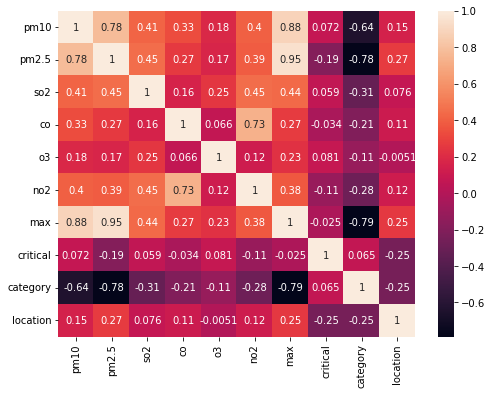

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sb

plt.figure(figsize=(8,6))

sb.heatmap(df.corr(), annot=True)

Dari matrix korelasi yang didapatkan, kita mengetahui bahwa pm2.5 dan max memiliki korelasi yang sangat tinggi dengan category (output), sehingga perlu dimasukkan kedalam model machine learning yang akan dibuat.

Adapun relasi yang dimiliki adalah negative correlation, dimana satu variabel akan semakin tinggi jika satu variabel semakin rendah. Hal ini terjadi karena semakin tinggi sebuah partikulat atau polutan yang terdapat dalam satu daerah, maka akan semakin buruk kualitas udaranya (0 sangat buruk, 2 baik).

Variabel critical tidak memiliki korelasi yang besar terhadap category, dikarenakan value dari variabel ini hanyalah eksplanasi terhadap value variabel partikulat suatu data (pm10, pm2.5, dst.) dan tidak akan digunakan ke dalam model (tidak relevan).

Oleh karena itu, kami memutuskan variabel independen yang akan digunakan dalam membangun model kami adalah:
**pm10, pm2.5, so2, co, o3, no2, max, dan location.**

###Pair Plot

Adapun kami menggunakan pairplot dari library yang disediakan oleh seaborn, untuk mengetahui penyebaran data dari dataset kami yang sudah di-preprocessing.

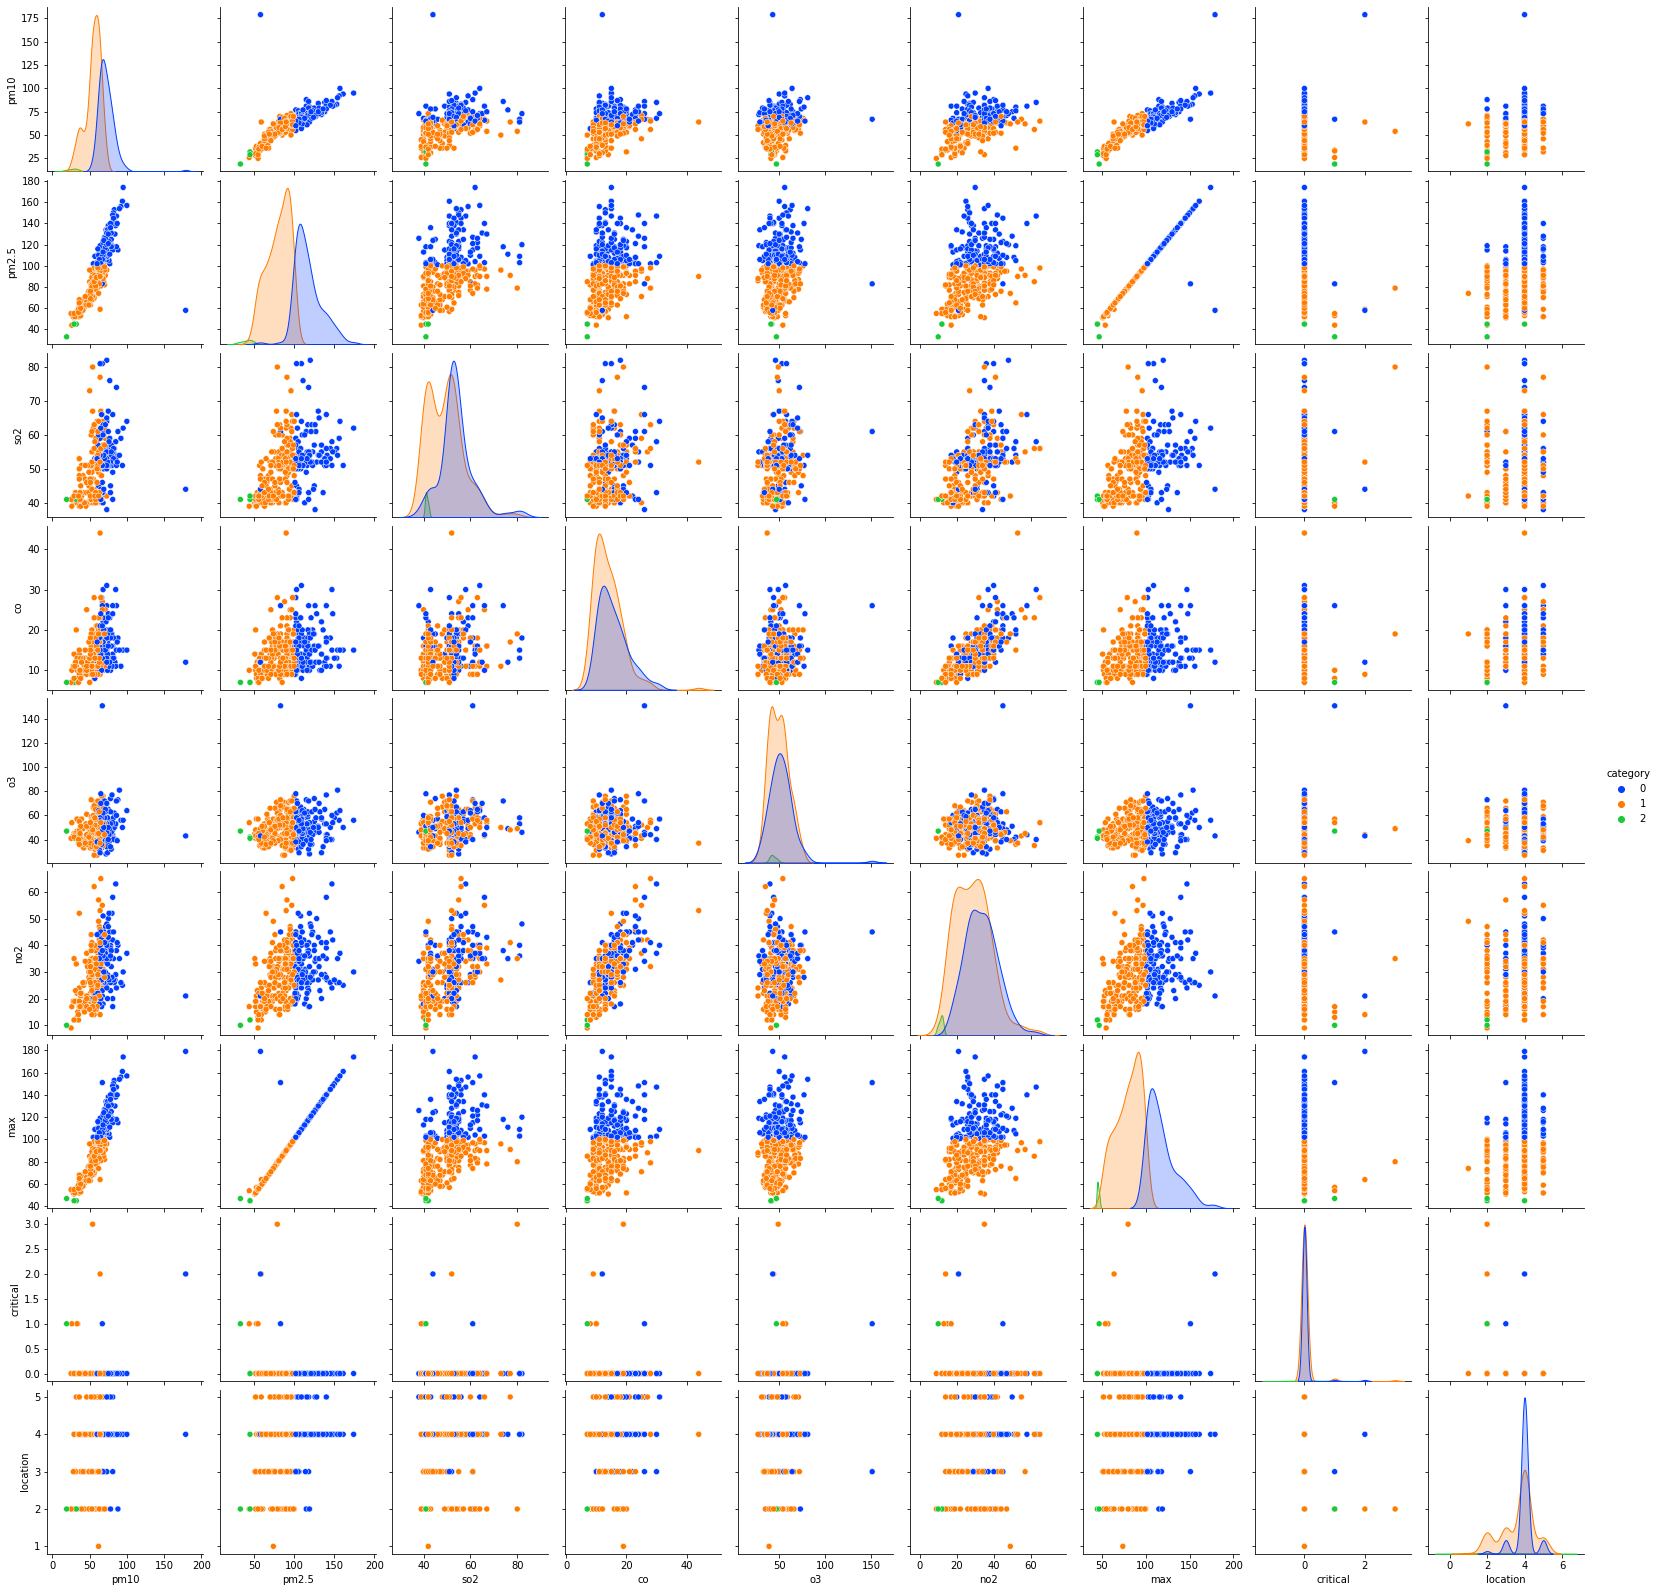

In [ ]:
import seaborn as sb
sb.pairplot(data=df, hue='category', palette='bright')

Kami dapat melihat relasi antar setiap variabel, dan output categorynya.
Adapun warna kategorinya adalah biru untuk tidak sehat, oranye untuk data sedang, dan hijau untuk data baik.

Secara garis besar, kita dapat melihat bahwa semakin tinggi suatu independen variabelnya, maka akan condong untuk masuk ke dalam kategori tidak sehat. Sedangkan pada persebaran variabel critical dan location, tidak dapat disimpulkan secara pasti karena mereka adalah variabel kategorikal, dimana setiap value dan outputnya akan tersebar secara merata.

###Splitting data

Dalam membuat model machine learning kami, kami akan membutuhkan Training Set untuk mengembangkan model dan Test Set untuk memeriksa kebenaran model. Kami akan membagi sebanyak 70% untuk Training Set, dan 30% untuk Test Set kami.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[["pm10", "pm2.5", "so2", "co", "o3", "no2", "max", "location"]]
Y = df["category"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.3)

#menunjukkan Training Set yang terpilih secara random
jointTrainData = pd.concat([XTrain, YTrain], axis=1)

jointTrainData

,pm10,pm2.5,so2,co,o3,no2,max,location,category
17,53,70.0,44,13,41,29,70,3,1
49,62,93.0,41,15,43,18,93,3,1
281,67,106.0,51,21,47,38,106,4,0
251,61,97.0,61,9,72,26,97,4,1
151,68,108.0,56,23,40,51,108,4,0
...,...,...,...,...,...,...,...,...,...
132,55,80.0,52,14,58,25,80,4,1
53,57,83.0,42,19,53,28,83,4,1
1,53,70.0,40,14,55,25,70,3,1
291,32,45.0,41,7,42,12,45,2,2


Maka sekarang kita sudah bisa menggunakan data yang sudah di preprocessing untuk mengembangkan model klasifikasi machine learning dengan berbagai algoritma (KNN, Decision Tree, Logistic Regression, dan SVM).

##KNN - K-Nearest Neighbor

KNN (K-Nearest Neighbor) merupakan sebuah metode untuk melakukan klasifikasi terhadap objek berdasarkan data pemelajaran yang jaraknya paling dekat dengan objek tersebut. 

Langkah pertama dalam menjalankan algoritma ini, kami perlu menentukan jumlah tetangga yang diperlukan untuk pertimbangan penentuan kelas, yaitu 3. Selanjutnya, mencari jarak terdekat sesuai dengan jumlah tetangga yang diperlukan dengan pengukuran iris yang tidak diketahui. Selanjutnya, kami menggunakan nilai paling sesuai dari K tertangga terdekat sebagai nilai respons yang perlu diprediksi untuk iris yang tidak diketahui. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors = 3).fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)


print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.9785407725321889
Test set acc:  0.94


Pada akhirnya, kami mendapatkan nilai akurasi 0.987 untuk train set, dan 0.96 untuk test set.

Adapun kami tidak dapat menampilkan plot untuk visualisasi KNN, dikarenakan kami menggunakan 8 buah variabel yang tidak mungkin dijadikan plot dengan 8 dimensi.

##Decision Tree

Decision Tree merupakan salah satu cara data processing dalam memprediksi masa depan dengan cara membangun klasifikasi atau regresi model dalam bentuk struktur pohon. Metode decision tree ini mempunyai kelebihan yaitu eksplorasi data dengan menemukan hubungan antara sejumlah calon variabel input dengan variabel target nya, dan metode ini juga mampu mengeliminasi perhitungan atau data-data yang tidak diperlukan. 

Langkah pertama setelah membaca file dataset, dan mengubah seluruh dataset dengan numerik, kita perlu memisahkan kolom fitur dari kolom target. Pada tahap diatas, kami sudah memisahkan kedua kolom tersebut. Setelah itu, dengan library python kami mencari nilai akurasi yang didapatkan dengan menggunakan metode ini:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DST = DecisionTreeClassifier(criterion="entropy").fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)

print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.9785407725321889
Test set acc:  0.94


Setelah membuat model decision tree, akurasi yang didapatkan untuk train set adalah 0.97 dan untuk test set adalah 0.94.

Berikut adalah *code* untuk menampilkan model decision tree yang sudah dibuat:

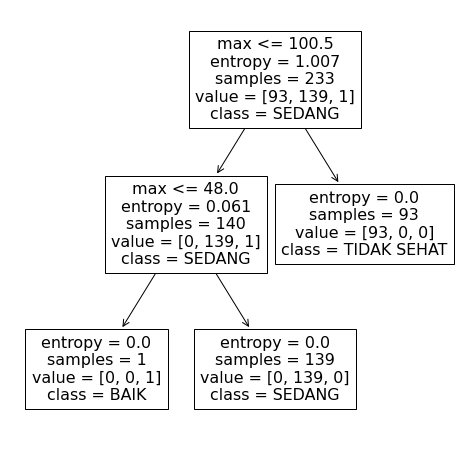

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = ["pm10", "pm2.5", "so2", "co", "o3", "no2", "max", "location"]
class_names = ["TIDAK SEHAT","SEDANG", "BAIK"]

plt.subplots(figsize=(8, 8))
tree.plot_tree(DST,feature_names=feature_names, class_names=class_names)
plt.savefig("decision_tree.png")

Dari graph decision tree yang terbuat, maka kami dapat melihat bahwa variabel yang digunakan hanyalah variabel 'max'.

Jika nilai max sebuah data lebih dari sama dengan 100.5, maka data tersebut akan berada di kategori tidak sehat.
Jika nilai max berada di bawah sama dengan 48, maka data tersebut berada di kategori baik.
Terakhir, jika sebuah nilai max berada di antara nilai 48 dan 100.5, maka data tersebut akan berada di kategori sedang.

##Logistic Regression

Regresi logistik adalah metode pembelajaran algoritma klasifikasi yang digunakan untuk menebak probabilitas variable yang ditarget. Karena variabel target memiliki 3 kategori ordinal (tidak sehat, sedang, baik), karena itu ini merupakan regresi logistik ordinal.

Pertama, modul regresi logistik di import dahulu. Setelah itu, dibuatlah classifier objek menggunakan fungsi logisticregression() dengan iterasi maksimal 10000. Lalu model di fit ke train set menggunakan fit().  Setelah itu, dibuatlah prediksi untuk Train dan Test variabel independen (CTest untuk prediksi test variabel independen, CTrain untuk prediksi train variabel independen).

Train set acc:  1.0
Test set acc:  0.96


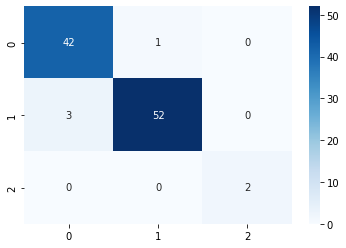

In [ ]:
from sklearn.linear_model import LogisticRegression

LGR = LogisticRegression(max_iter=10000).fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)

print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

Hasil akurasi Train Set sangat tinggi, yaitu 100%. Hasil akurasi test set juga sangat tinggi, yaitu 96%.

Confusion matrix digunakan untuk mengevaluasi performance model klasifikasi. Hasilnya divisualisasi dalam bentuk heatmap.

Berikut adalah hasil confusion matrix. Hasilnya:
Ada 3 instansi 'tidak sehat' yang classifier kira sebagai 'sedang'
Ada 1 instansi 'sedang' yang classifier kira sebagai 'tidak sehat'
Selain itu, instansi lain dikelompokkan dengan benar.

##SVM

SVM merupakan metode klasifikasi data mining. Tujuan dari SVM adalah untuk memisahkan kumpulan data dengan cara terbaik. Algoritma SVM akan menggambar hyperplane antar kelas untuk memisahkan mereka, lalu mencari margi/distance maksimum antar titik data dari masing masing kelas.

Pertama, import modul SVC (Linear Support Vector Classifier) dahulu. Lalu, SVC akan digunakan untuk menganalisa data train variable independen dan dependen yang sudah di fit. Setelah itu, dibuatlah hasil prediksi untuk Train dan Test Variable (CTest untuk prediksi Test variabel independen, CTrain untuk prediksi Train variabel independen).

Train set acc:  0.9828326180257511
Test set acc:  0.95


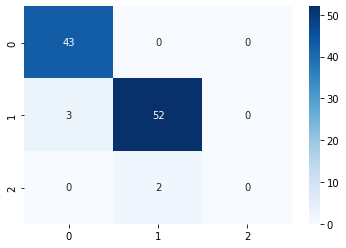

In [ ]:
from sklearn.svm import SVC

SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)

print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

Lalu dicari akurasi set train dan test. Hasilnya:
Akurasi train set dapat dibilang sangat tinggi, hingga mencapai 98.3%
Akurasi test set juga sangat tinggi, hingga 95%

Setelah itu dibuat confusion matrix untuk mengevaluasi performance model klasifikasi. Hasilnya akan divisualisasi dalam bantuk heatmap.

Hasil confusion matrix:
Ada 3 instansi 'tidak sehat' yang dikira sebagai 'sedang'
Ada 2 instansi 'sedang' yang dikira sebagai 'baik'

#Kesimpulan dan Saran

Berikut adalah tabel akurasi test set yang telah kami dapatkan dengan 4 macam algoritma klasifikasi:

Algoritma	| Akurasi
---|---
K-NN|0.94
Decision Tree|0.94
Logistic Regression|0.96
SVM|0.95


Adapun algoritma dengan akurasi tertinggi berada di Logistic Regression, yaitu 0.96.

Hasil akhir ini mungkin terlihat overfitting, tetapi memang data yang kami pakai untuk membuat model Machine Learning ini memang sedikit dan sederhana.

Untuk kedepannya, kami memberikan saran kepada Kementerian Lingkungan Hidup dan Kehutanan Republik Indonesia, untuk menyediakan data yang lengkap dan tidak ambigu kedepannya, agar data-data tersebut bisa digunakan untuk dilakukan *research* dan digunakan untuk menambah ilmu masyarakat secara luas.